In [33]:
# ==============================
# Standard Library Imports
# ==============================
from enum import Enum
import random

# ==============================
# Third-party Library Imports
# ==============================
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy
import pennylane as qml
import scipy as sp
from autograd import grad, jacobian

# Pennylane numpy
from pennylane import numpy as pnp 

In [34]:
# ==============================
# Setup for Quantum Computations
# ==============================

# PennyLane settings
dev = qml.device('default.mixed', wires=1)

# Define Hamiltonian for quantum computations

In [35]:
class INDEX(Enum):
    OFF = 0
    POSTIVE = 1
    NEGATIVE = -1

In [36]:
control_x = 0, 1, -1
control_y = 0, 1, -1

coeff_z = 1

coeffs_1 = [
    1 * control_x[0], 
    1 * control_y[0], 
    coeff_z
]

coeffs_2 = [
    1 * control_x[0], 
    1 * control_y[0], 
    coeff_z
]

rot = [
    qml.PauliX(0), 
    qml.PauliY(0), 
    qml.PauliZ(0)
]

hamiltonian_1 = qml.Hamiltonian(coeffs_1, rot)
hamiltonian_2 = qml.Hamiltonian(coeffs_2, rot)

hamiltonian_full = hamiltonian_1 + hamiltonian_2

In [ ]:
def get_hamiltonian(x1, x2, y1, y2):
    control_x = 0, 1, -1
    control_y = 0, 1, -1

    coeff_z = 1

    coeffs_1 = [
        1 * control_x[0], 
        1 * control_y[0], 
        coeff_z
    ]

    coeffs_2 = [
        1 * control_x[0], 
        1 * control_y[0], 
        coeff_z
    ]

    rot = [
        qml.PauliX(0), 
        qml.PauliY(0), 
        qml.PauliZ(0)
    ]

    hamiltonian_1 = qml.Hamiltonian(coeffs_1, rot)
    hamiltonian_2 = qml.Hamiltonian(coeffs_2, rot)

In [37]:
@qml.qnode(dev)
def circuit(paras):
    dt = 1
    qml.ApproxTimeEvolution(hamiltonian_1, dt, 1)
    qml.ApproxTimeEvolution(hamiltonian_2, dt, 1)
    
    return qml.density_matrix(wires=0)

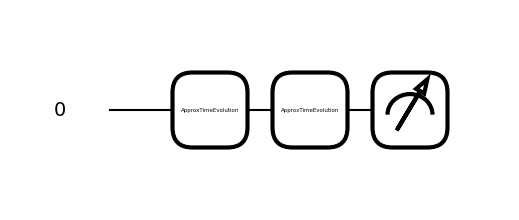

In [38]:
fig, ax = qml.draw_mpl(circuit)(0)

In [ ]:
def cost_function(parameters):
    
   